In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Which users are most likely to purchase virtual merchandise?

In [2]:
data = pd.read_csv('2025-VeloCityX-Expanded-Fan-Engagement-Data.csv')

# 0 for no purchases, 1 for any purchase
data['Purchased Merchandise'] = np.where(data['Virtual Merchandise Purchases'] > 0, 1, 0)

features = ['Fan Challenges Completed', 'Predictive Accuracy (%)',
            'Sponsorship Interactions (Ad Clicks)', 'Time on Live 360 (mins)', 
            'Real-Time Chat Activity (Messages Sent)']

X = data[features]
y = data['Purchased Merchandise']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
})
print(coefficients)

Accuracy: 0.8
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.17      0.20         6
           1       0.86      0.91      0.89        34

    accuracy                           0.80        40
   macro avg       0.56      0.54      0.54        40
weighted avg       0.77      0.80      0.78        40

                                   Feature  Coefficient
0                 Fan Challenges Completed     0.159776
1                  Predictive Accuracy (%)     0.013865
2     Sponsorship Interactions (Ad Clicks)     0.114048
3                  Time on Live 360 (mins)     0.003956
4  Real-Time Chat Activity (Messages Sent)    -0.015695


# Analysis of Virtual Merchandise Purchases

## Model Summary
- **Accuracy**:  
  The model achieves an **80% accuracy**, meaning 80% of predictions on the test set were correct. While this suggests decent overall performance, **accuracy alone** can be misleading due to the **class imbalance** (34 purchasers vs. 6 non-purchasers).

- **Precision**:  
  - **Class 1 (Purchasers)**: Precision is **0.86**, indicating that when the model predicts a user will purchase merchandise, it is correct **86% of the time**.  
  - **Class 0 (Non-purchasers)**: Precision is **0.25**, meaning that only **25%** of the predicted non-purchasers were correctly identified. This low precision suggests the model struggles to correctly predict users who do not purchase, likely due to the class imbalance (34 purchasers vs. 6 non-purchasers).

- **Recall**:  
  - **Class 1 (Purchasers)**: Recall is **0.91**, meaning the model correctly identified **91% of all actual purchasers**.  
  - **Class 0 (Non-purchasers)**: Recall is **0.17**, meaning that only **17%** of the actual non-purchasers were correctly identified. This reflects the challenge of identifying non-purchasers in the presence of class imbalance (34 purchasers vs. 6 non-purchasers).

- **Macro vs. Weighted Averages**:  
  - The macro average f1-score is **0.54**. This low value suggests that the model struggles to perform well across both classes—especially with the non-purchasing class (class 0), which has few samples.
  - The weighted f1-score is **0.78**. This score reflects that the model performs much better on purchasers (class 1), as they represent the majority class.

---

## Feature Impact on Merchandise Purchases
- **Fan Challenges Completed**:  
  This feature has the highest **positive coefficient (0.1598)**, indicating that users who participate in more challenges are significantly more likely to purchase virtual merchandise. **Gamified activities** appear to correlate strongly with purchasing behavior.

- **Sponsorship Interactions (Ad Clicks)**:  
  The second most influential feature, with a coefficient of **0.1140**. Users who interact with **ads and sponsorship content** are more likely to purchase merchandise, suggesting that **brand engagement** positively influences purchasing behavior.

- **Predictive Accuracy (%)**:  
  Although this feature has a **positive coefficient (0.0139)**, its impact is minimal. **Prediction-related activities** may indicate some level of interest, but they do not drive merchandise purchases as strongly as **challenges** and **ad interactions**.

- **Time on Live 360 (mins)**:  
  This feature has a **small positive effect (0.0040)**. While users who spend more time on live events are slightly more inclined to purchase merchandise, this feature is **less influential** compared to **challenges** and **ads**.

- **Real-Time Chat Activity (Messages Sent)**:  
  This feature has a **negative coefficient (-0.0157)**, suggesting that higher chat activity slightly reduces the likelihood of purchasing merchandise. This could indicate that **socially active users** are more engaged in community interactions rather than purchasing.

---

## Summary and Insights
- **Key Predictors**:  
  **Fan Challenges Completed** and **Sponsorship Interactions** are the strongest predictors, indicating that **gamified content** and **ad engagement** play significant roles in driving virtual merchandise purchases.

- **Challenges with Class Imbalance**:  
  The model is **biased toward predicting purchasers** and struggles with identifying non-purchasers, as seen from the low precision and recall for class 0. To address class imbalance, we can apply techniques like **oversampling the minority class** (non-purchasers), undersampling the **majority class** (purchasers), or using **class-weight adjustments** in the logistic regression model to give more importance to the minority class.

- **User Behavior Insights**:  
  - **Gamified engagement and ad interactions** correlate positively with merchandise purchases.
  - **Time spent watching live events** has only a minor influence on purchases.
  - **High chat activity** does not translate to purchasing behavior, possibly indicating that these users prioritize community interactions over buying merchandise.

---

## Conclusion
Users who are highly engaged with **fan challenges** and **sponsorships** are the most likely to buy virtual merchandise. Therefore, the platform should encourage gamified participation and increase ad interactions to further drive sales.

## Data visualizations to support the analysis

### Relationship between the user activities and the likelihood of purchasing merchandise

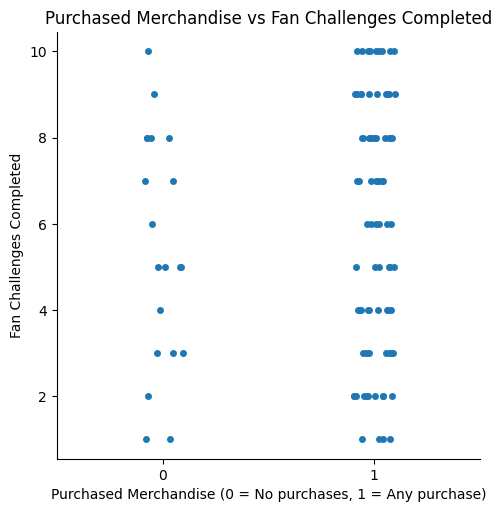

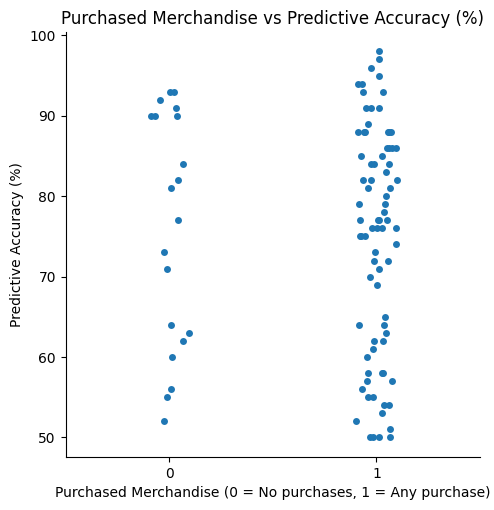

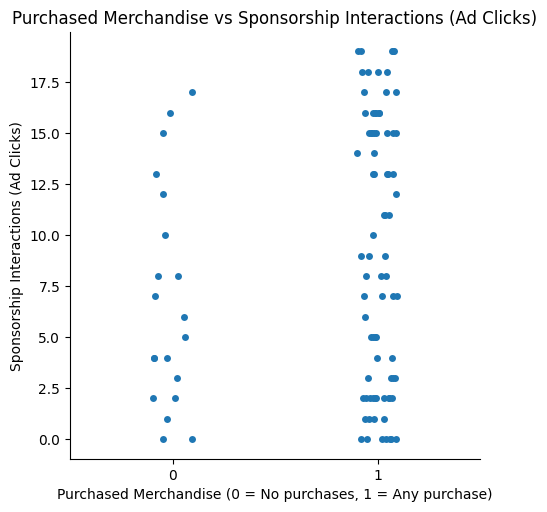

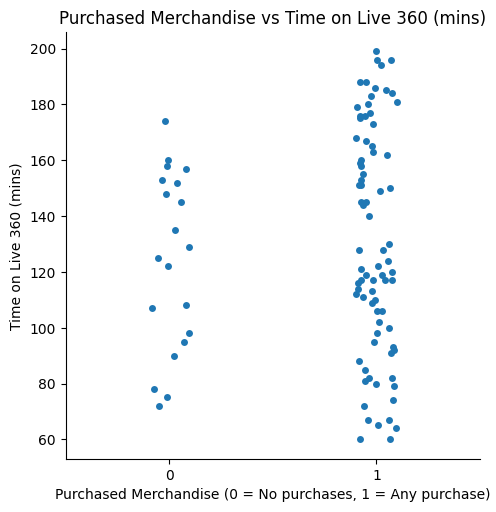

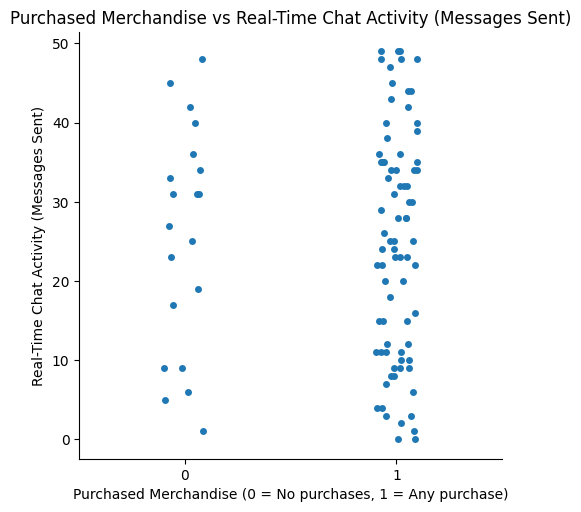

In [3]:
for feature in features:
    sns.catplot(x='Purchased Merchandise', y= feature, data=data)
    plt.title(f'Purchased Merchandise vs {feature}')
    plt.xlabel('Purchased Merchandise (0 = No purchases, 1 = Any purchase)', fontsize=10)

### Coefficient Plot

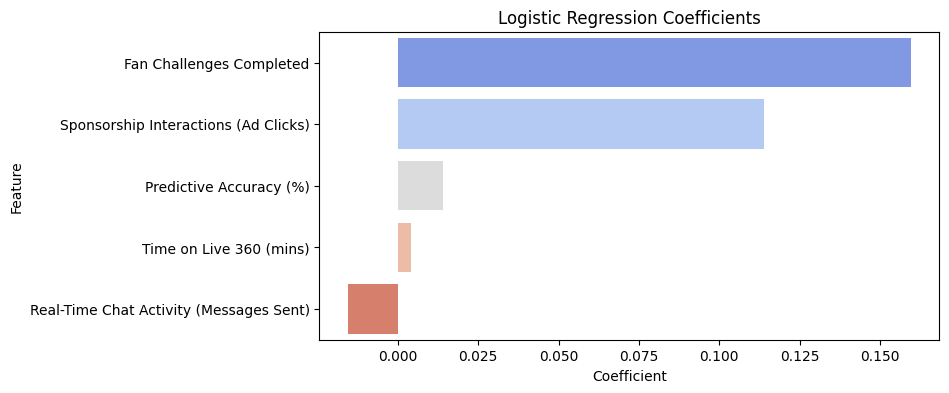

In [4]:
#                                    Feature  Coefficient
# 0                 Fan Challenges Completed     0.159776
# 1                  Predictive Accuracy (%)     0.013865
# 2     Sponsorship Interactions (Ad Clicks)     0.114048
# 3                  Time on Live 360 (mins)     0.003956
# 4  Real-Time Chat Activity (Messages Sent)    -0.015695

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='coolwarm')
plt.title('Logistic Regression Coefficients')
plt.show()

### Confusion Matrix
- True Positive (Bottom-Right Quadrant): Predicted positive and it’s true (1,1).
- True Negative (Top-Left Quadrant): Predicted negative and it’s true (0,0).
- False Positive (Top-Right Quadrant): Predicted positive and it’s false (1,0).
- False Negative (Bottom-Left Quadrant): Predicted negative and it’s false (0,1).

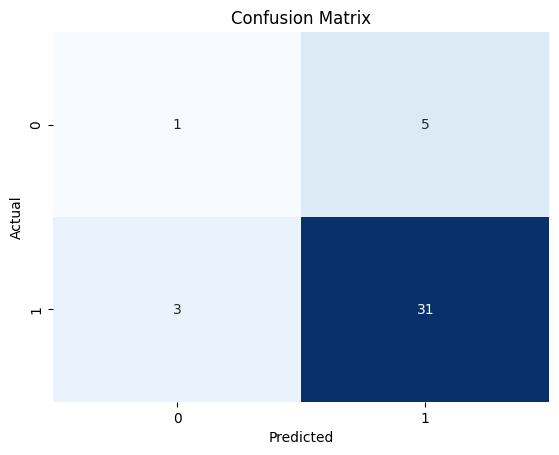

In [5]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Predicted Probabilities of Purchasing Merchandise vs. User Activities

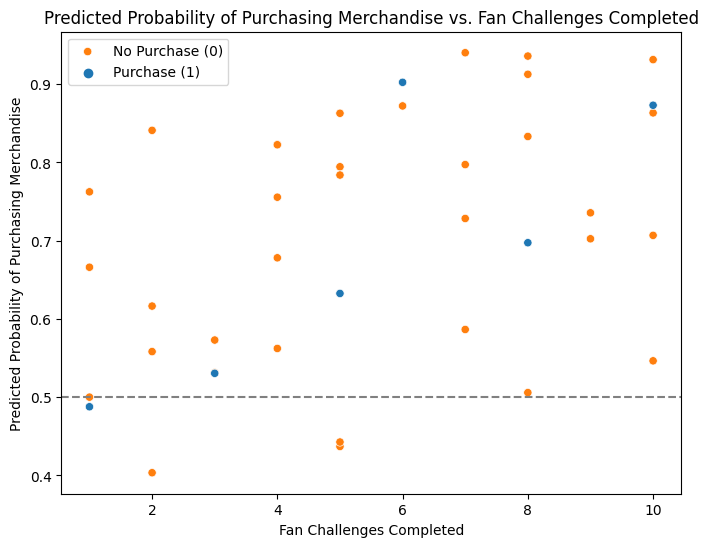

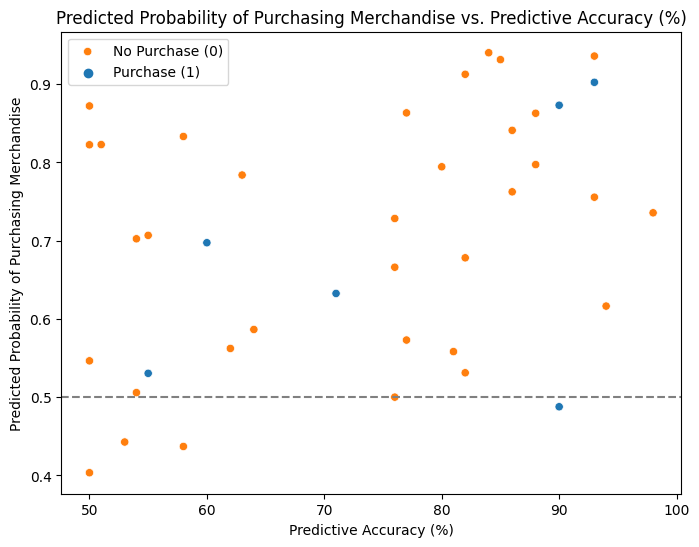

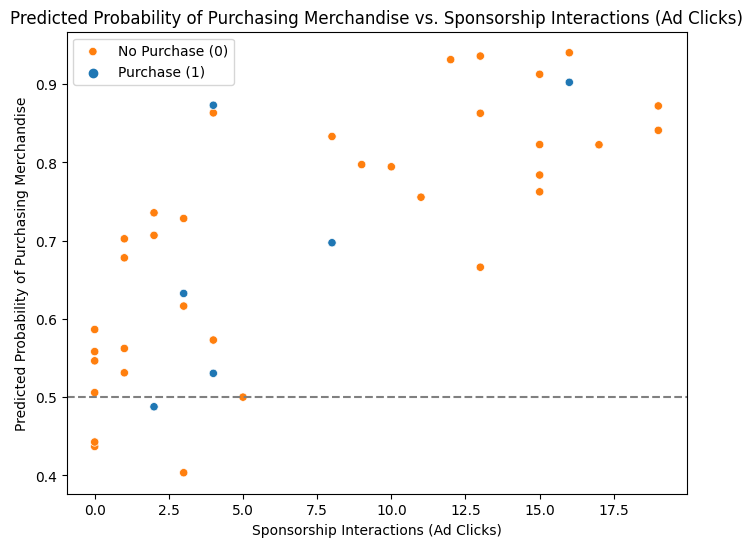

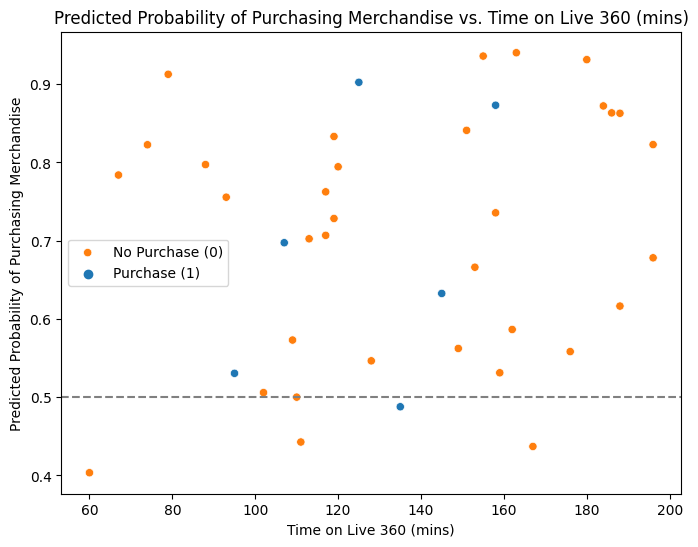

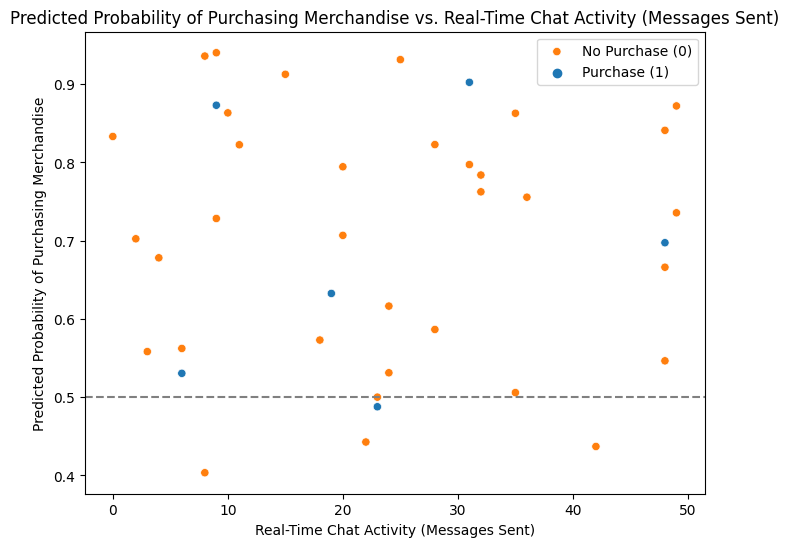

In [6]:
for feature in features:
    # Predicted probabilities
    y_prob = model.predict_proba(X_test)  # shape (n_samples, n_classes)
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_test[feature], y=y_prob[:, 1], hue=y_test)
    
    plt.xlabel(feature)
    plt.ylabel('Predicted Probability of Purchasing Merchandise')
    plt.title(f'Predicted Probability of Purchasing Merchandise vs. {feature}')
    plt.axhline(0.5, color='gray', linestyle='--')  # Threshold line at 0.5
    plt.legend(labels=['No Purchase (0)', 'Purchase (1)'])
    
    plt.show()

##  How do user activities during race events correlate with their merchandise purchases and sponsorship interaction? 

In [7]:
data = pd.read_csv('2025-VeloCityX-Expanded-Fan-Engagement-Data.csv')

features = ['Fan Challenges Completed', 'Predictive Accuracy (%)', 
            'Sponsorship Interactions (Ad Clicks)', 'Time on Live 360 (mins)', 
            'Real-Time Chat Activity (Messages Sent)', 'Virtual Merchandise Purchases']

features2 = ['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Time on Live 360 (mins)', 
            'Real-Time Chat Activity (Messages Sent)', 'Sponsorship Interactions (Ad Clicks)']

features3 = ['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Time on Live 360 (mins)', 
            'Real-Time Chat Activity (Messages Sent)', 'Virtual Merchandise Purchases']

df = data[features]

# Pearson correlation coefficient
correlation_matrix = df.corr()

print("Correlation between 'Virtual Merchandise Purchases' and other activities:")
for feature in features2:
    corr, p_value = pearsonr(df[feature], df['Virtual Merchandise Purchases'])
    print(f"- Correlation between {feature} and Purchased Merchandise: {corr:.3f} (p-value: {p_value:.4f})")
print("\n")
print("Correlation between 'Sponsorship Interactions' and other activities:")
for feature in features3:
    corr, p_value = pearsonr(df[feature], df['Sponsorship Interactions (Ad Clicks)'])
    print(f"- Correlation between {feature} and Sponsorship Interactions: {corr:.3f} (p-value: {p_value:.4f})")

Correlation between 'Virtual Merchandise Purchases' and other activities:
- Correlation between Fan Challenges Completed and Purchased Merchandise: 0.159 (p-value: 0.1132)
- Correlation between Predictive Accuracy (%) and Purchased Merchandise: 0.022 (p-value: 0.8265)
- Correlation between Time on Live 360 (mins) and Purchased Merchandise: -0.008 (p-value: 0.9407)
- Correlation between Real-Time Chat Activity (Messages Sent) and Purchased Merchandise: -0.045 (p-value: 0.6589)
- Correlation between Sponsorship Interactions (Ad Clicks) and Purchased Merchandise: 0.071 (p-value: 0.4855)


Correlation between 'Sponsorship Interactions' and other activities:
- Correlation between Fan Challenges Completed and Sponsorship Interactions: -0.065 (p-value: 0.5190)
- Correlation between Predictive Accuracy (%) and Sponsorship Interactions: 0.057 (p-value: 0.5759)
- Correlation between Time on Live 360 (mins) and Sponsorship Interactions: -0.074 (p-value: 0.4648)
- Correlation between Real-Time Cha

# Analysis of User Activities, Merchandise Purchases, and Sponsorship Interaction

## Key Findings on Correlation with Merchandise Purchases  
The correlations between user activities during race events and merchandise purchases are generally **weak**, with **high p-values** indicating that the observed relationships are not statistically significant.

- **Fan Challenges Completed and Merchandise Purchases**:  
  - Correlation: **0.159**, p-value: **0.1132**  
  - This suggests a **weak positive correlation**, indicating that participation in fan challenges may have a slight influence on merchandise purchases, though the relationship is not statistically significant.

- **Predictive Accuracy (%) and Merchandise Purchases**:  
  - Correlation: **0.022**, p-value: **0.8265**  
  - This indicates a **very weak positive correlation**, showing that users’ predictive performance has little to no impact on their purchase behavior.

- **Time on Live 360 (mins) and Merchandise Purchases**:  
  - Correlation: **-0.008**, p-value: **0.9407**  
  - This suggests **almost no correlation**, implying that the time spent watching live events does not significantly influence merchandise purchases.

- **Real-Time Chat Activity and Merchandise Purchases**:  
  - Correlation: **-0.045**, p-value: **0.6589**  
  - This indicates a **negligible correlation**, suggesting that active participation in chat has no measurable effect on merchandise purchases.

---

## Key Findings on Correlation with Sponsorship Interaction  
- **Fan Challenges and Sponsorship Interactions**:  
  - Correlation: **-0.065**, p-value: **0.5190**  
  - This shows a **weak negative correlation**, indicating that participation in fan challenges does not effectively promote ad engagement.

- **Predictive Accuracy (%) and Sponsorship Interactions**:  
  - Correlation: **0.057**, p-value: **0.5759**  
  - This indicates a **very weak positive correlation**, suggesting that predictive performance is not strongly related to ad interaction.

- **Time on Live 360 (mins) and Sponsorship Interactions**:  
  - Correlation: **-0.074**, p-value: **0.4648**  
  - This reveals a **weak negative correlation**, implying that spending more time watching events may slightly decrease ad interactions.

- **Real-Time Chat Activity and Sponsorship Interactions**:  
  - Correlation: **0.191**, p-value: **0.0566**  
  - This represents a **moderate positive correlation**, nearing statistical significance, suggesting that users who are more engaged in chat are slightly more likely to interact with sponsorship ads.

---

## Interpretation and Insights  
- **Merchandise Purchases**:  
  User activities such as **fan challenges, live event watching, and chat participation** show **no substantial influence** on merchandise purchases. This suggests that factors outside of these activities, such as **personal preferences or promotional incentives**, may play a more critical role in driving purchasing behavior.

- **Sponsorship Interactions**:  
  Although most user activities show weak correlations with sponsorship interactions, **chat activity** demonstrates a **moderate positive correlation**, indicating that users who are socially engaged in chat are also more likely to respond positively to sponsorship content.

---

## Conclusion
User activities during race events, including participation in challenges, outcome predictions, and live viewing, exert **minimal influence** on merchandise purchases. However, the **moderate correlation between real-time chat activity and ad engagement** implies that enhancing community interaction may boost sponsorship interactions. To improve merchandise sales, the platform should consider exploring additional strategies, such as **targeted promotions** or **personalized recommendations**, which could be more effective in influencing purchasing decisions.

## Data visualizations to support the analysis

### Correlation Heatmap

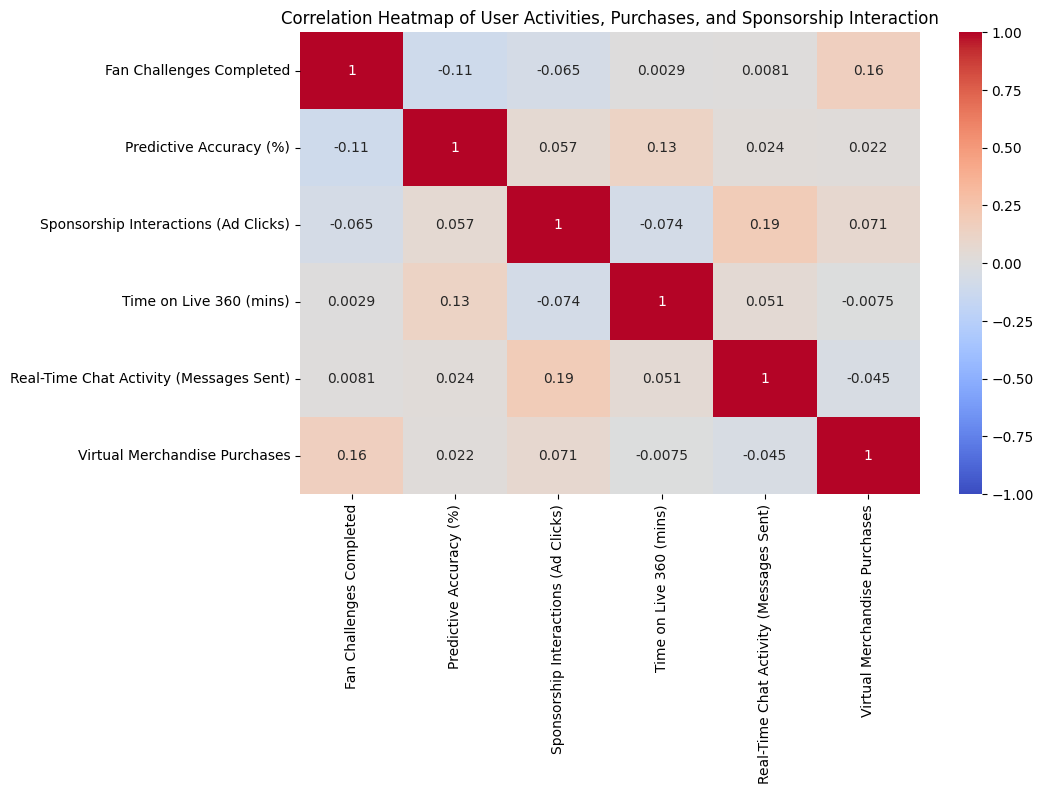

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of User Activities, Purchases, and Sponsorship Interaction')
plt.show()

### Correlation between Virtual Merchandise Purchases and other activities

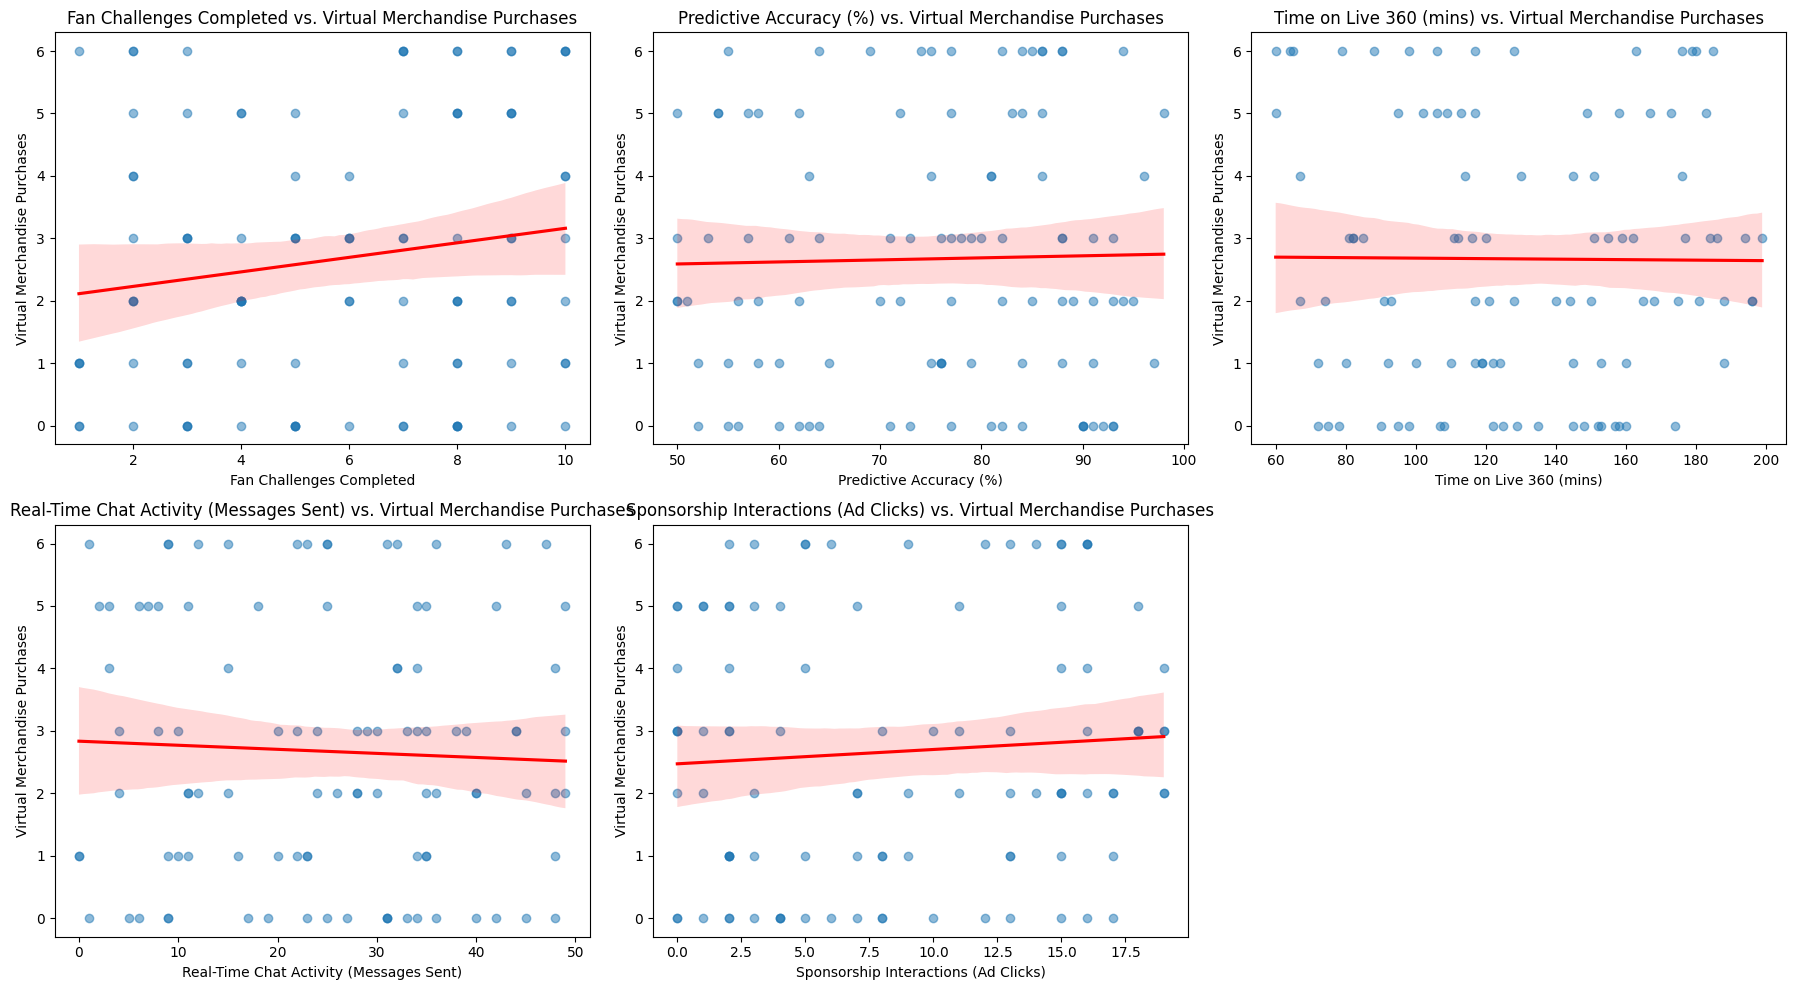

In [9]:
# - Correlation between Fan Challenges Completed and Purchased Merchandise: 0.159 (p-value: 0.1132)
# - Correlation between Predictive Accuracy (%) and Purchased Merchandise: 0.022 (p-value: 0.8265)
# - Correlation between Time on Live 360 (mins) and Purchased Merchandise: -0.008 (p-value: 0.9407)
# - Correlation between Real-Time Chat Activity (Messages Sent) and Purchased Merchandise: -0.045 (p-value: 0.6589)
# - Correlation between Sponsorship Interactions (Ad Clicks) and Purchased Merchandise: 0.071 (p-value: 0.4855)

data = pd.read_csv('2025-VeloCityX-Expanded-Fan-Engagement-Data.csv')

activities = [
    'Fan Challenges Completed',
    'Predictive Accuracy (%)',
    'Time on Live 360 (mins)',
    'Real-Time Chat Activity (Messages Sent)',
    'Sponsorship Interactions (Ad Clicks)'
]

plt.figure(figsize=(18, 10))
for i, activity in enumerate(activities, 1):
    plt.subplot(2, 3, i)
    sns.regplot(data=data, x=activity, y='Virtual Merchandise Purchases', 
                scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    plt.title(f'{activity} vs. Virtual Merchandise Purchases')
    plt.xlabel(activity)
    plt.ylabel('Virtual Merchandise Purchases')

plt.tight_layout()  
plt.show()  

### Correlation between Sponsorship Interactions (Ad Clicks) and other activities

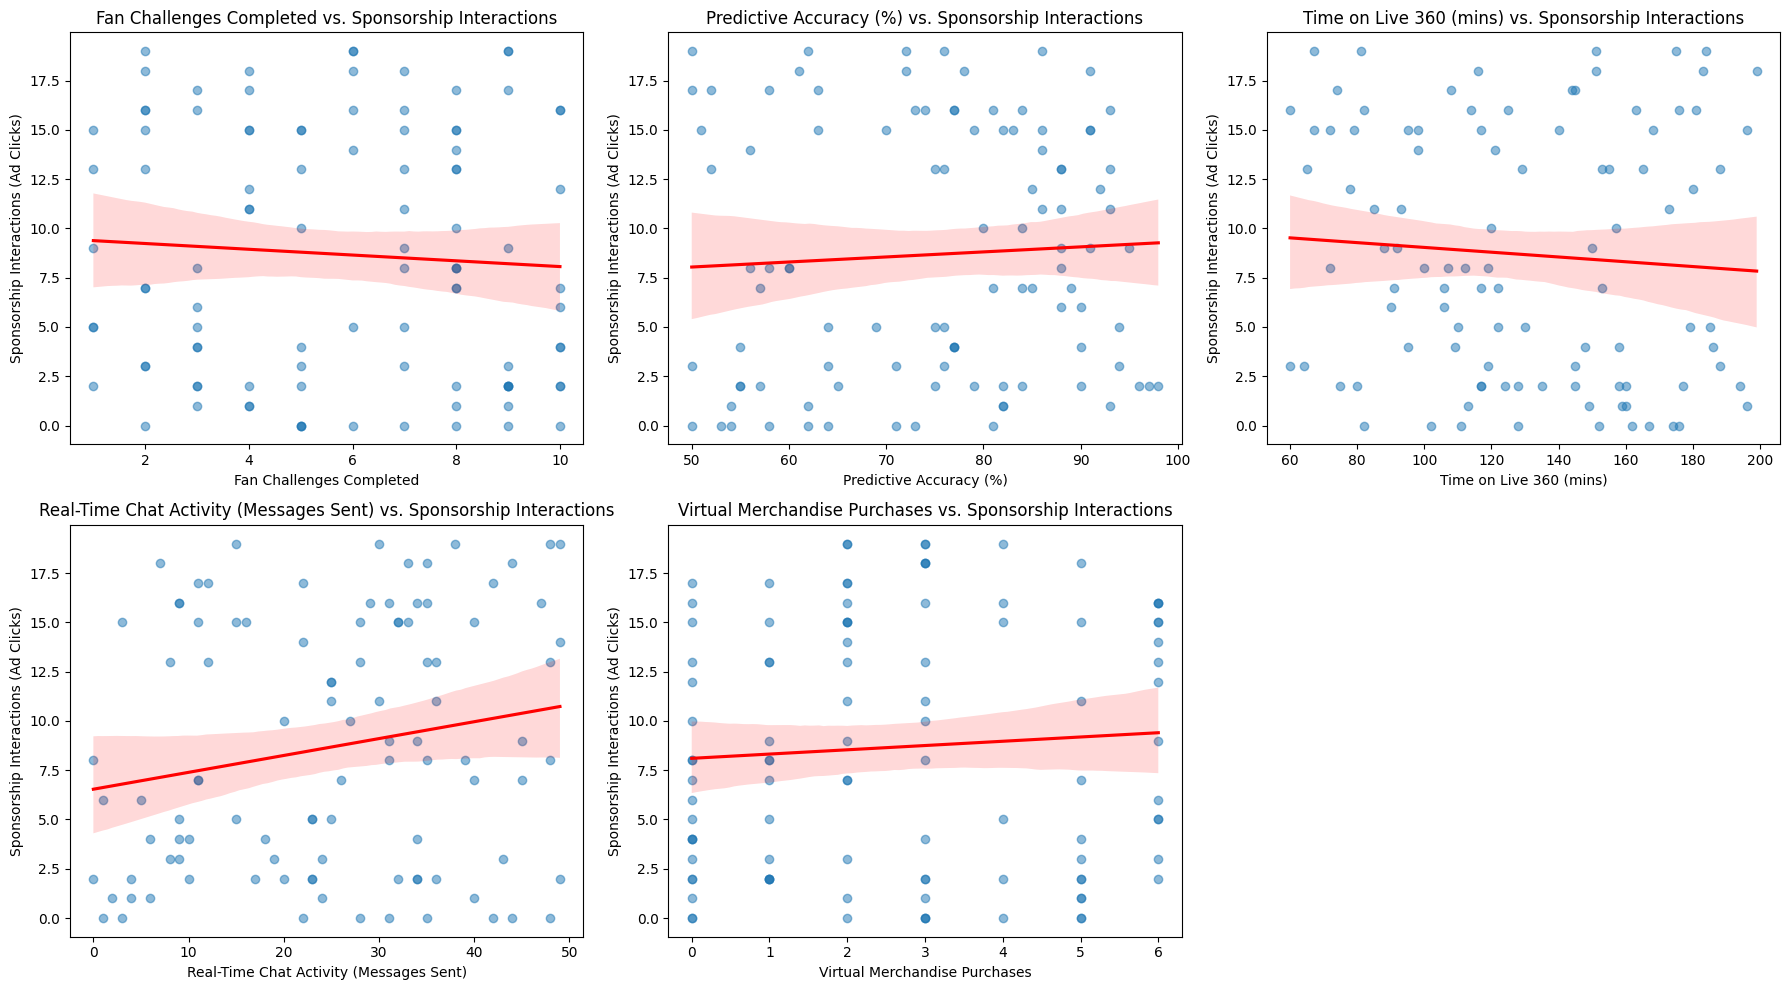

In [10]:
# - Correlation between Fan Challenges Completed and Sponsorship Interactions: -0.065 (p-value: 0.5190)
# - Correlation between Predictive Accuracy (%) and Sponsorship Interactions: 0.057 (p-value: 0.5759)
# - Correlation between Time on Live 360 (mins) and Sponsorship Interactions: -0.074 (p-value: 0.4648)
# - Correlation between Real-Time Chat Activity (Messages Sent) and Sponsorship Interactions: 0.191 (p-value: 0.0566)
# - Correlation between Virtual Merchandise Purchases and Sponsorship Interactions: 0.071 (p-value: 0.4855)

data = pd.read_csv('2025-VeloCityX-Expanded-Fan-Engagement-Data.csv')

activities = [
    'Fan Challenges Completed',
    'Predictive Accuracy (%)',
    'Time on Live 360 (mins)',
    'Real-Time Chat Activity (Messages Sent)',
    'Virtual Merchandise Purchases'
]

plt.figure(figsize=(18, 10))
for i, activity in enumerate(activities, 1):
    plt.subplot(2, 3, i)
    sns.regplot(data=data, x=activity, y='Sponsorship Interactions (Ad Clicks)', 
                scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    plt.title(f'{activity} vs. Sponsorship Interactions')
    plt.xlabel(activity)
    plt.ylabel('Sponsorship Interactions (Ad Clicks)')

plt.tight_layout()  
plt.show()

# Proposed Fan Challenge: **"Ultimate VelocX Quest"**

## Overview
The "Ultimate VelocX Quest" is designed to enhance fan engagement and increase merchandise purchases through interactive and rewarding activities. This challenge leverages insights from user activities and predicted outcomes from our analysis.

## Challenge Details
- **Duration**: 4 weeks
- **Eligibility**: All fans using VeloCityX app
- **Objective**: Complete a series of activities to earn points and unlock exclusive rewards.

### Activities
1. **Fan Challenges Completed**:
   - Complete a minimum of 5 unique fan challenges.
   - Points: 10 points per challenge

2. **Real-Time Chat Participation**:
   - Engage in real-time chats during live events.
   - Points: 1 point per message sent, bonus 5 points for every 10 messages.

3. **Predictive Accuracy Games**:
   - Participate in prediction games related to team performance.
   - Points: 15 points for each correct prediction.

4. **Sponsorship Interactions**:
   - Click on sponsor ads and engage with promotional content.
   - Points: 2 points per interaction, bonus 10 points for 5 interactions.

5. **Time on Live 360**:
   - Spend at least 60 minutes in live 360 events.
   - Points: 20 points for achieving the goal.

### Rewards
- **Tier 1 (50 points)**: Exclusive digital badge and shoutout on social media.
- **Tier 2 (100 points)**: 20% discount on merchandise.
- **Tier 3 (150 points)**: Exclusive access to a virtual meet-and-greet with team players.
- **Grand Prize (200 points)**: A signed merchandise package and a VIP experience during the next event.

## Predicted Outcomes
Based on our analysis of user activities, we anticipate the following outcomes:

- **Engagement**:
  - Increased interaction rates with live events by 30%.
  - A 50% increase in participation in fan challenges.

- **Monetization**:
  - An expected 25% uplift in merchandise purchases from engaged fans.
  - Higher sponsorship interaction rates, projected to boost ad revenue by 15%.

## Conclusion
The "Ultimate VelocX Quest" is a strategic initiative aimed at maximizing fan engagement and driving monetization through gamification. By integrating various activities and rewarding fans for their participation, we create a community of active supporters while enhancing the overall fan experience.